In [ ]:
!pip install ruamel.yaml pyocclient

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 21.8 MB/s eta 0:00:00
  Created wheel for pyocclient: filename=pyocclient-0.6-py3-none-any.whl size=26035 sha256=92a97abe4fd331136e652b7a00793dc8e5b2d683a04f9db090d7dc014144cd09
  Stored in directory: /root/.cache/pip/wheels/4a/16/13/2efef99a37d52029be77fdf67e96d0ddc67c10fe4393107379
Successfully built pyocclient


In [ ]:
!git clone https://github.com/HelmchenLabSoftware/Cascade

Cloning into 'Cascade'...
remote: Enumerating objects: 3481, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 3481 (delta 185), reused 95 (delta 95), pack-reused 3241 (from 3)
Receiving objects: 100% (3481/3481), 472.91 MiB | 26.91 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.
Updating files: 100% (828/828), done.


In [ ]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import ruamel.yaml as yaml
yaml = yaml.YAML(typ='rt')

os.chdir('Cascade')
from cascade2p import cascade
from cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth

In [ ]:
import owncloud
import os

oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/3jovrEc01AlyeHY')
oc.get_file('/', 'F.npy');

oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/AF9SnIHGthVTRIN')
oc.get_file('/', 'Fneu.npy');

oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/QZysnRPFhagYAzA')
oc.get_file('/', 'spks.npy');


In [ ]:
import numpy as np

F = np.load('F.npy')
Fneu = np.load('Fneu.npy')
spks = np.load('spks.npy')

In [ ]:
Fcorr = [(F[i] - 0.1*Fneu[i]) for i in range(len(F))]
dF = [(Fcorr[i] - np.median(Fcorr[i])) for i in range(len(Fcorr))]
dff = np.array([dF[i]/np.median(Fcorr[i]) for i in range(len(dF))])

## Running Cascade

In [ ]:
inds = [2, 5, 6, 7, 8, 10, 11]
traces = dff[inds]
deconv = spks[inds]

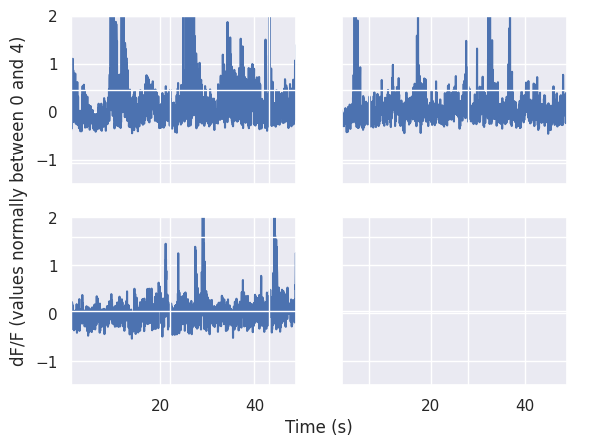

In [ ]:
neuron_indices = [0, 1, 2]
time_axis = plot_dFF_traces(traces,neuron_indices, 30)

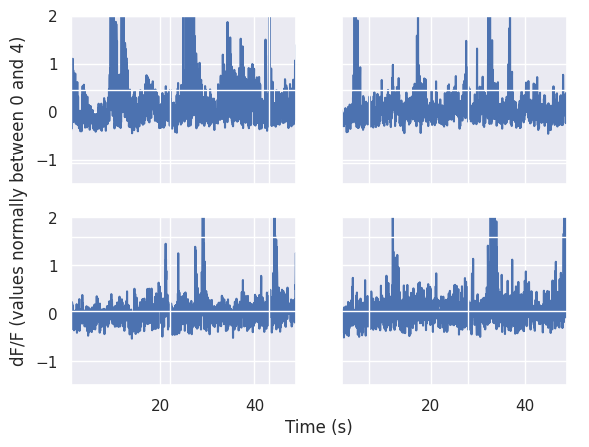

In [ ]:
neuron_indices = [0, 1, 2, 3]
time_axis = plot_dFF_traces(traces,neuron_indices, 30)

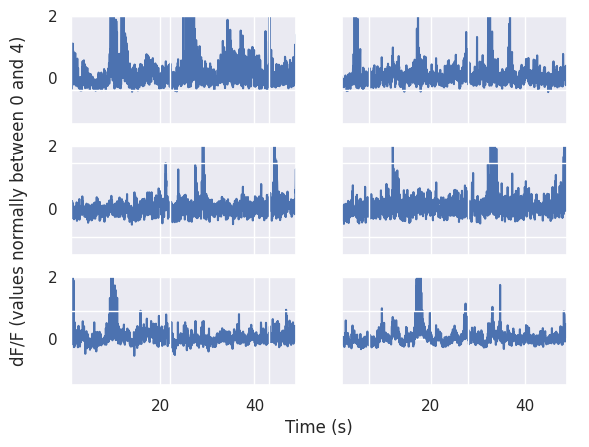

In [ ]:
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices, 30)

## Changing Classifier


All the currently available models/classifiers can be seen by running the below cell.

In [ ]:
yaml_file = open('Pretrained_models/available_models.yaml')
X = yaml.load(yaml_file)
list_of_models = list(X.keys())
print('\n List of available models: \n')
for model in list_of_models:
  print(model)


 List of available models: 

Global_EXC_1Hz_smoothing500ms
Global_EXC_1Hz_smoothing1000ms
Zebrafish_1Hz_smoothing1000ms
Global_EXC_2Hz_smoothing300ms
Global_EXC_2Hz_smoothing500ms
Global_EXC_2Hz_smoothing1000ms
Global_EXC_2.5Hz_smoothing400ms_high_noise
Global_EXC_3Hz_smoothing400ms
Global_EXC_3Hz_smoothing400ms_high_noise
Global_EXC_3Hz_smoothing400ms_causalkernel
Global_EXC_4.25Hz_smoothing300ms
Global_EXC_4.25Hz_smoothing300ms_high_noise
Global_EXC_4.25Hz_smoothing300ms_causalkernel
Global_EXC_5Hz_smoothing200ms
Global_EXC_5Hz_smoothing200ms_causalkernel
Global_EXC_6Hz_smoothing200ms
Global_EXC_6Hz_smoothing200ms_causalkernel
Global_EXC_7Hz_smoothing200ms
Global_EXC_7Hz_smoothing200ms_causalkernel
Global_EXC_7.5Hz_smoothing200ms_high_noise
Global_EXC_7.5Hz_smoothing200ms
Global_EXC_7.5Hz_smoothing200ms_causalkernel
OGB_zf_pDp_7.5Hz_smoothing200ms
OGB_zf_pDp_7.5Hz_smoothing200ms_causalkernel
Global_EXC_10Hz_smoothing50ms
Global_EXC_10Hz_smoothing50ms_causalkernel
Global_EXC_10Hz_smo

Pretrained model was saved in folder "/content/Cascade/Pretrained_models/Global_EXC_30Hz_smoothing25ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 25 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 3.22, 0.82

Predictions for noise level 2:


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
	... ensemble 2


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step



Predictions for noise level 3:


	... ensemble 0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
	... ensemble 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
	... ensemble 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
	... ensemble 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
	... ensemble 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step



Predictions for noise level 4:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level

Predictions for noise level 9:
	No neurons for this noise level
Spike rate inference done.


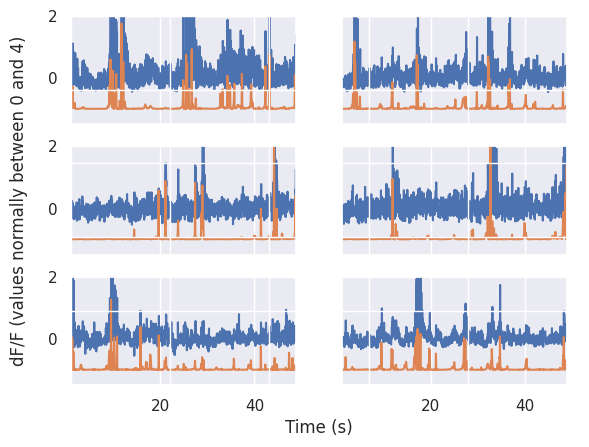

In [ ]:
model_name = "Global_EXC_30Hz_smoothing25ms_causalkernel"
cascade.download_model(model_name)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob)

**Example** Use a model and infer spikes.

Pretrained model was saved in folder "/content/Cascade/Pretrained_models/Global_EXC_30Hz_smoothing100ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 30Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 100 milliseconds. 
 

Loaded model was trained at frame rate 30 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 3.22, 0.82

Predictions for noise level 2:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step



Predictions for noise level 3:


	... ensemble 0
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
	... ensemble 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
	... ensemble 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
	... ensemble 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
	... ensemble 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step



Predictions for noise level 4:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level
Spike rate inference done.


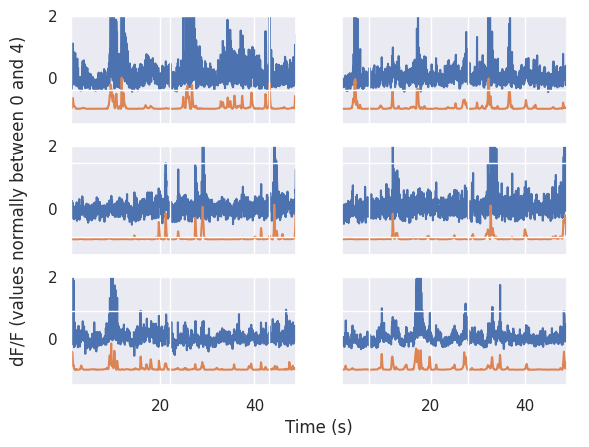

In [ ]:
model_name = "Global_EXC_30Hz_smoothing100ms_causalkernel"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob)

Use another model from the list of classifiers and infer spikes.



Pretrained model was saved in folder "/content/Cascade/Pretrained_models/Zebrafish_1Hz_smoothing1000ms"

 
The selected model was trained on 5 datasets, with 5 ensembles for each noise level, at a sampling rate of 1Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 1000 milliseconds. 
 

Loaded model was trained at frame rate 1 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 17.65, 4.51

Predictions for noise level 2:
	No neurons for this noise level

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neurons for this noise level

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:
	No neurons for this noise level

Predictions for noise level 7:
	No neurons for this noise level

Predictions for noise level 8:
	No neurons for this noise level

Predictions for noise level 9:
	No neurons fo

	... ensemble 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
	... ensemble 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
	... ensemble 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
	... ensemble 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
	... ensemble 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step



Predictions for noise level 11:


	... ensemble 0
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
	... ensemble 1
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
	... ensemble 2
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
	... ensemble 3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
	... ensemble 4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Spike rate inference done.


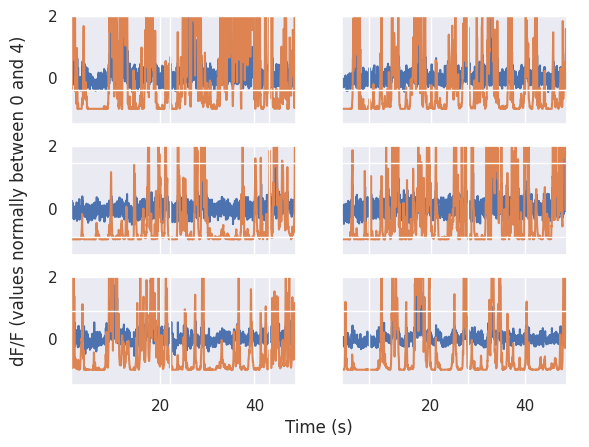

In [ ]:
model_name = "Zebrafish_1Hz_smoothing1000ms"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob)

Use another model from the list of classifiers and infer spikes.

Pretrained model was saved in folder "/content/Cascade/Pretrained_models/GC8_EXC_3Hz_smoothing500ms_high_noise"

 
The selected model was trained on 3 datasets, with 5 ensembles for each noise level, at a sampling rate of 3.0Hz, with a resampled ground truth that was smoothed with a Gaussian kernel of a standard deviation of 500 milliseconds. 
 

Loaded model was trained at frame rate 3.0 Hz
Given argument traces contains 7 neurons and 2000 frames.
Noise levels (mean, std; in standard units): 10.19, 2.6

Predictions for noise level 2:
	No neurons for this noise level

Predictions for noise level 3:
	No neurons for this noise level

Predictions for noise level 4:
	No neurons for this noise level

Predictions for noise level 5:
	No neurons for this noise level

Predictions for noise level 6:


	... ensemble 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
	... ensemble 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
	... ensemble 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
	... ensemble 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
	... ensemble 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



Predictions for noise level 8:


	... ensemble 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
	... ensemble 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
	... ensemble 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
	... ensemble 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
	... ensemble 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step



Predictions for noise level 10:


	... ensemble 0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
	... ensemble 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
	... ensemble 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
	... ensemble 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
	... ensemble 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step



Predictions for noise level 12:
	No neurons for this noise level

Predictions for noise level 14:


	... ensemble 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
	... ensemble 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
	... ensemble 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
	... ensemble 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
	... ensemble 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Predictions for noise level 16:
	No neurons for this noise level

Predictions for noise level 19:
	No neurons for this noise level

Predictions for noise level 22:
	No neurons for this noise level

Predictions for noise level 26:
	No neurons for this noise level

Predictions for noise level 30:
	No neurons for this noise level
Spike rate inference done.


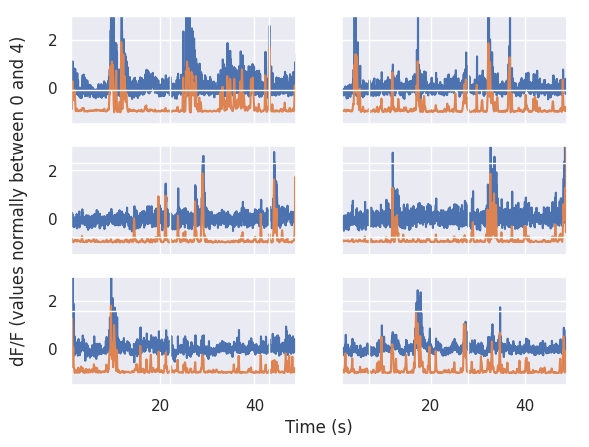

In [ ]:
model_name = "GC8_EXC_3Hz_smoothing500ms_high_noise"
cascade.download_model(model_name,verbose = 1)
spike_prob = cascade.predict( model_name, traces)
neuron_indices = [0, 1, 2, 3, 4, 5]
time_axis = plot_dFF_traces(traces,neuron_indices,30,spike_prob,y_range=(-1.5, 3))

## Comparing Cascade Spike Inference with OASIS Spike Inference

**Example** Compare spikes inferred from OASIS with Cascade for neuron 1.

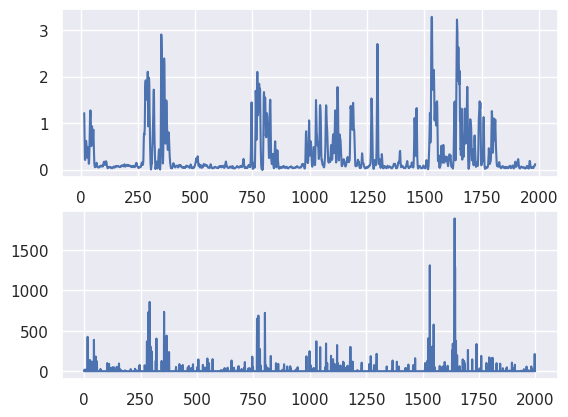

In [ ]:
plt.subplot(211)
plt.plot(spike_prob[0])

plt.subplot(212)
plt.plot(deconv[0])

Compare spikes inferred from OASIS with Cascade for neuron 2.

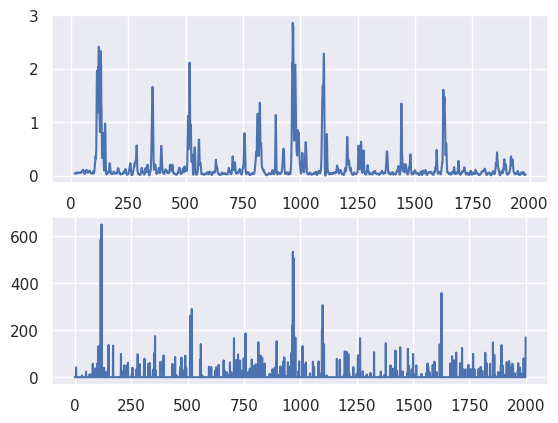

In [ ]:
plt.subplot(211)
plt.plot(spike_prob[1])

plt.subplot(212)
plt.plot(deconv[1])

Compare spikes inferred from OASIS with Cascade for neuron 3.

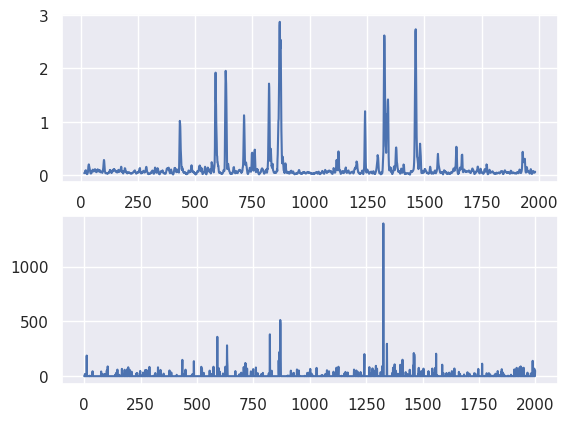

In [ ]:
plt.subplot(211)
plt.plot(spike_prob[2])

plt.subplot(212)
plt.plot(deconv[2])